Another common variant of kfold is repeated kfold cross validation. This means that the folding and training processes get repeated several times, shuffling the dataset at each instance.

Read up n how to perform repeated kfold here

Then, create a model to predict university admission again, this time using all independent varible, and krepeated kfold of your choice. Can you improve on the results without cross validation? Can you improve on the results from the Leave One Out cross validation?

In [89]:
#Loading the libraries 

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline 

In [90]:
df=pd.read_csv('../uni_admission.csv')

In [92]:
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

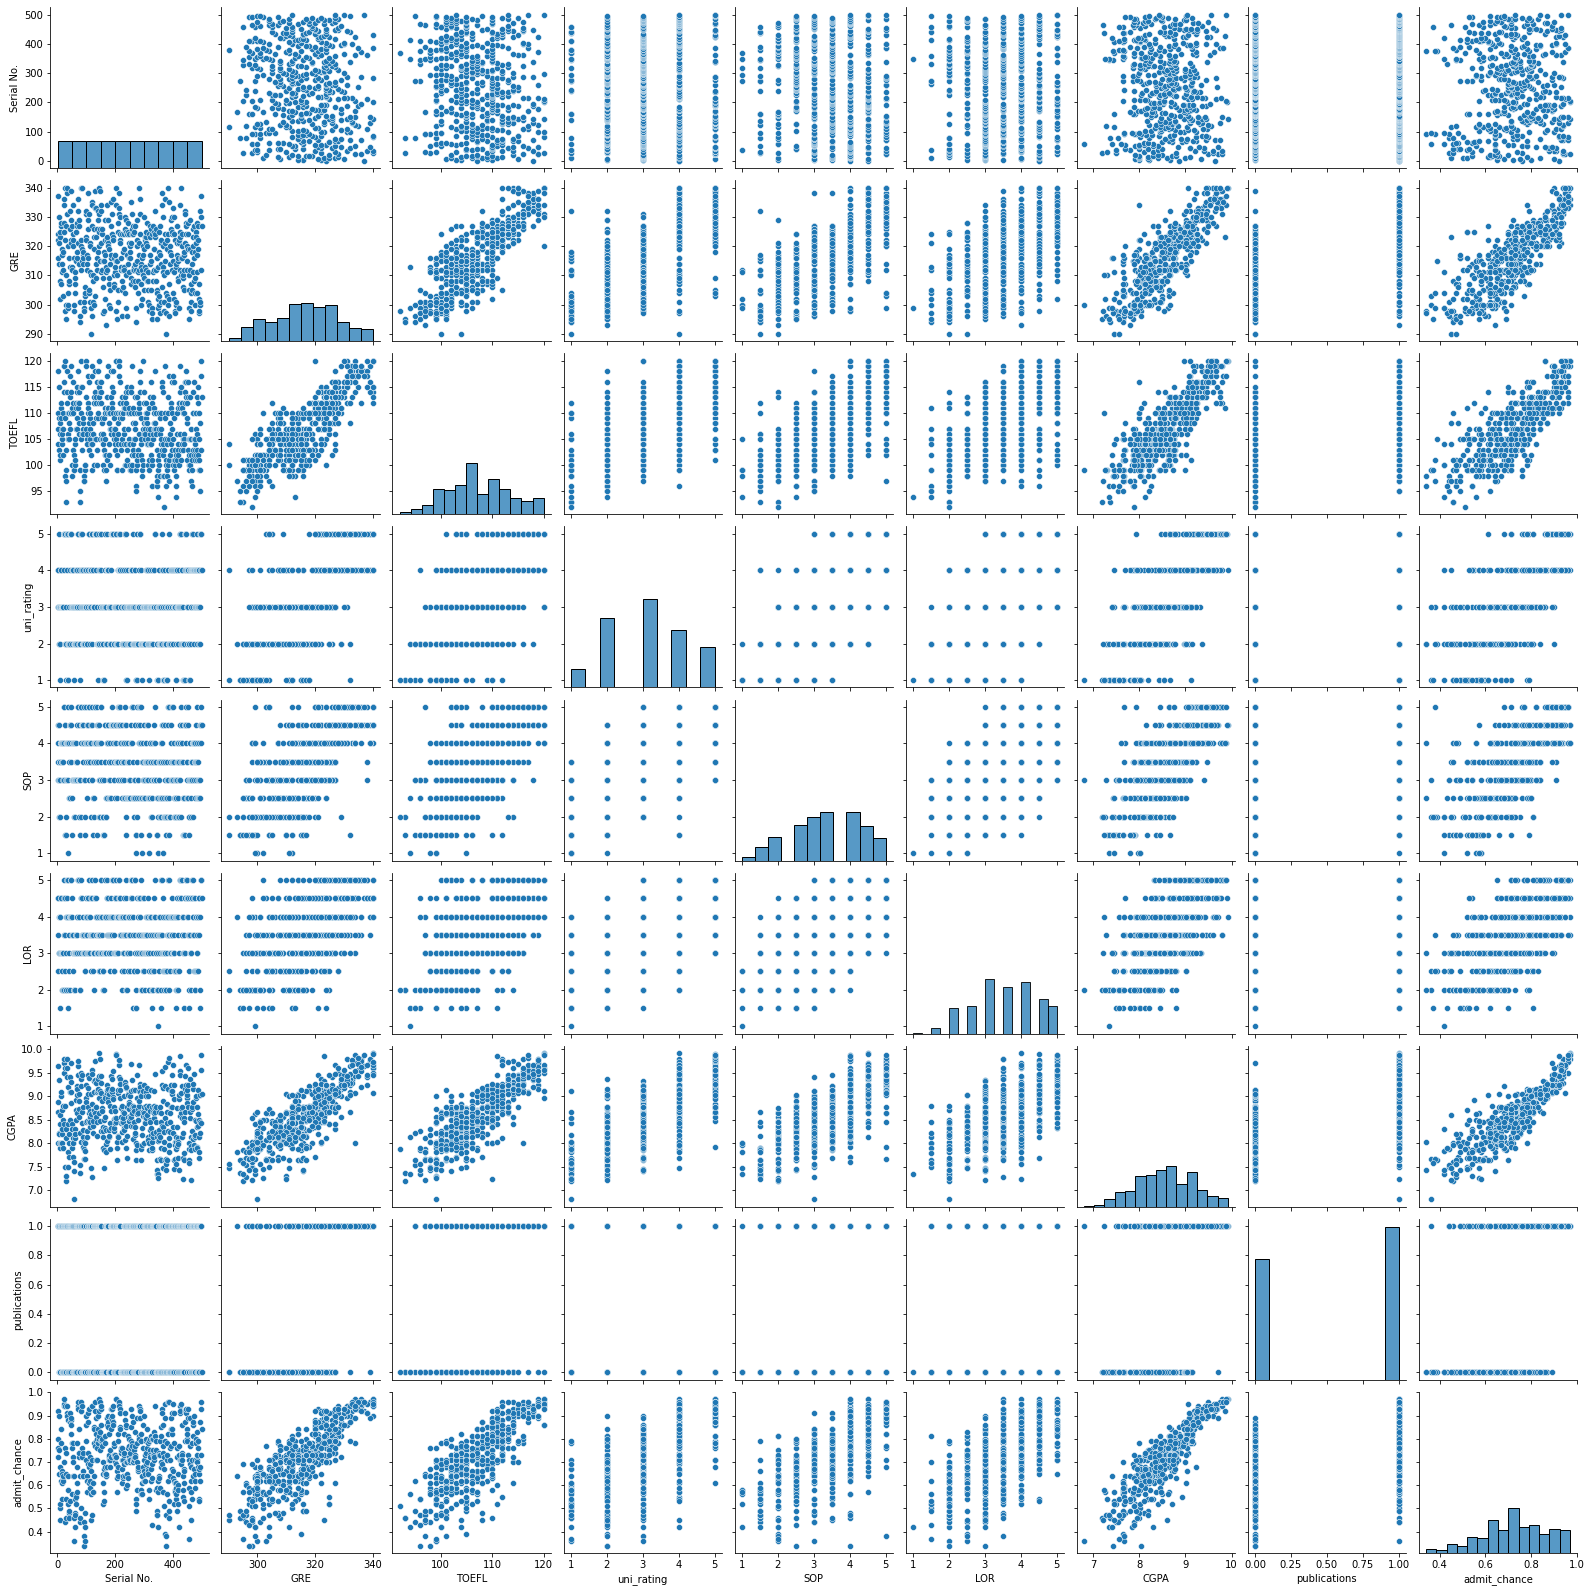

In [81]:
#Try to plot and see the relationship between the two


sns.pairplot(df)

In [82]:
#Look at how the variables are correlated 


# A heatmap of correlations 

<AxesSubplot:>

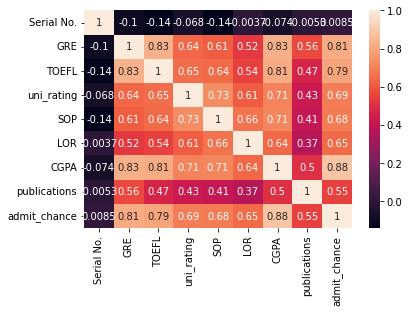

In [83]:
sns.heatmap(df.corr(), annot=True)

# Distribution plot of what we are predicting 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='admit_chance', ylabel='Density'>

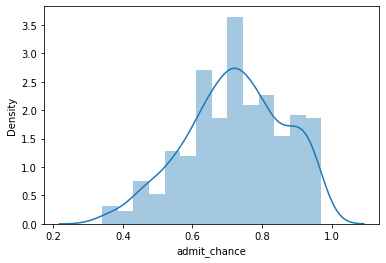

In [84]:
sns.distplot(df['admit_chance'])

# Divide Data into test and train split 

In [85]:
#Checking the column

df.columns

Index(['Serial No.', 'GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA',
       'publications', 'admit_chance'],
      dtype='object')

In [86]:
from sklearn import metrics
X=df[['GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA']].values
y=df['admit_chance'].values


RMSES=[]
count=1


for train_index, test_index in rkf.split(X):


    X_train, X_test =X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse_value)
    count+=1
    print('trained ' + str(count) + ' models' )
    
    
    np.mean(RMSES)

print(count)

    




trained 2 models
trained 3 models
trained 4 models
trained 5 models
trained 6 models
trained 7 models
trained 8 models
trained 9 models
trained 10 models
trained 11 models
trained 12 models
trained 13 models
trained 14 models
trained 15 models
trained 16 models
16


In [87]:
np.mean(RMSES)

0.06098835801431934

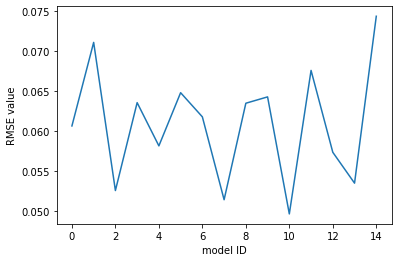

In [88]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()